<h1><center>Ergometer Competition | SDA 2024</center></h1>

## I - Team Information
1. Hoang Thuy Duong VU | 12413578
2. Johan
3. Inès HUMMEL
4. Céline CHEN

## II - Présentation du projet

Le fichier `.zip` joint contient les données recueillies au cours d’une compétition d’ergomètre *(machine à ramer)* → L’ensemble de fichiers sous forme `.json`.

La compétition se déroule comme suit: chaque série comporte 4 rameurs qui vont parcourir 2000m virtuels sur leurs machines. 

>**But**: Être le plus rapide possible sur ces 2000m. 

Les données de chaque série sont enregistrées par les machines et recueillies. 

Les courses ont été paramétrées pour que chaque parcours de 2000m soit divisé en 4 parties de 500m, ie. les stats données par les ergomètres sont calculées et restituées tous les 500m. 

Chaque fichier `.zip` correspond à une série. 

## III - Table of Contents

1. [Requirements](#i---requirements)

2. [Utils](#ii---utils)

3. [Data Preprocessing](#iii---data-preprocessing)
    1. [Schema](#schema)
    2. [Race over 2000m](#race-over-2000m)
        1. [Creation 2000m](#creation-2000m)
        2. [Description 2000m](#description-2000m)

    3. [Race over 500m](#race-over-500m)
        1. [Creation 500m](#creation-500m)
        2. [Description 500m](#description-500m)

4. [Data Exploration](#iv---data-exploration)
    1. [Question 1](#question-1)
    2. [Question 2](#question-2)
    3. [Question 3](#question-3\)


---

# I - Requirements

In [1]:
# Import pandas
import pandas as pd
import numpy as np

# ========================================
import os

directory = os.getcwd() + "/Test/"
db_lst = os.listdir(directory) 

print("List of database :",db_lst)

# ========================================
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress a specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)

List of database : ['Série 1(0001).json', 'Série 4.json', 'Série 5.json', 'Série 2.json', 'Série 3.json', 'Progressif.json', 'Série 6.json', 'Série 7.json']


# II - Utils

In [2]:
# Identify duplicate columns having different names
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            iv = vs.iloc[:,i].tolist()
            for j in range(i+1, lcs):
                jv = vs.iloc[:,j].tolist()
                if iv == jv:
                    dups.append(cs[i])
                    break

    return dups 

# III - Data preprocessing

*@Writer : Duong*

## Schema

*(à insérer l'image dessus)*

## Race over 2000m
### Creation 2000m

In [3]:
# Create 2000m ergometer database

# Get columns
col = list(pd.read_json("Test/" + db_lst[0]).loc["participants"][0][0].keys())
col.remove('splits')
print("Columns name :",col)

#df_main = pd.DataFrame(pd.read_json("Test/" + db_lst[0]).loc["participants"][0][0])
dict_main = dict()
for c in range(len(col)) : 
    if col[c] not in dict_main : 
        dict_main[col[c]] = []

for db in range(len(db_lst)) : 
    data = pd.read_json("Test/" + db_lst[db]).loc["participants"][0]
    for i in range(len(data)) : 
        # print(db_lst[db])
        # df = pd.DataFrame(pd.read_json("Test/" + db_lst[db]).loc["participants"][0][0])
        # for c in range(len(col)) : 
        #     pass
        df = pd.DataFrame(pd.read_json("Test/" + db_lst[db]).loc["participants"][0][i])
        for c in range(len(col)) : 
            dict_main[col[c]].append(np.unique(list(df[col[c]]))[0])

ergo_2000m = pd.DataFrame(dict_main)
ergo_2000m.replace(to_replace='',value=np.nan,inplace=True)

for c in range(len(col)) : 
    if ergo_2000m[col[c]].isna().sum() >= len(ergo_2000m) // 2 : 
        ergo_2000m.drop([col[c]],axis=1,inplace=True)

ergo_2000m.drop(duplicate_columns(ergo_2000m),axis=1,inplace=True)

ergo_2000m.drop(["machine_type"],axis=1,inplace=True)

# To save
ergo_2000m.to_json("Test/ergometer_2000m.json", index=False)

Columns name : ['affiliation', 'avg_pace', 'calories', 'class', 'distance', 'id', 'lane', 'logbook_id', 'logged_time', 'machine_type', 'participant', 'place', 'score', 'serial_number', 'spm', 'time']


### Description 2000m

**Fichier à utiliser** : `Test/ergometer_2000m.json`

|id|Nom de colonnes|Signification|Mesuré en|
|-|-|-|-|
|0|avg_pace|L’allure moyenne du rameur pendant la course, mesurée en minutes et secondes par 500 mètres|`1:59.3` pour une allure de 1 minute et 59,3 secondes par 500m|
|1|calories|Le nombre total de calories brûlées par le participant pendant la course, calculé en fonction de l’effort fourni et de la durée de la course|calories|
|2|distance|La distance totale parcourue par le participant en mètres|mètre|
|3|lane|Le numéro de la ligne attribuée au participant, qui permet d’identifier sa position dans la série de la course|numéro|
|4|logged_time|L’horodatage indiquant le moment où les données ont été enregistrées, souvent sous forme de chaîne de caractères|texte|
|5|participant|Le nom ou l’identifiant du rameur participant à la compétition, stocké sous forme de chaîne de caractères|texte|
|6|place|Le classement final ou la position du rameur à la fin de la course|numéro|
|7|serial_number|Le numéro de série de la machine d’ergomètre utilisée par le participant. Ce numéro permet de tracer chaque machine individuellement|numéro|
|8|splits|Informations concernant les 4 splits de 500m|objet JSON|
|9|spm|Strokes per minute (SPM), c’est-à-dire le nombre de coups de rame par minute. Cela mesure la cadence du rameur pendant la course|coups par minute (SPM)|
|10|time|Le temps total pris par le rameur pour terminer la course, probablement sous forme de chaîne de caractères|format de type HH:MM:SS|


In [4]:
print("Number of data :",len(ergo_2000m))

Number of data : 32


In [5]:
# Visualisation des données
ergo_2000m.head()

,avg_pace,calories,distance,lane,logged_time,participant,place,serial_number,spm,time
0,1:59.3,131,2000,3,22/01/2023 09:51:00,Eric,1,430839301,27,7:57.3
1,2:00.9,130,2000,1,22/01/2023 09:51:00,Edouard,2,530398582,30,8:03.7
2,2:05.2,125,2000,2,22/01/2023 09:52:00,Baptiste,3,530087901,24,8:21.1
3,2:06.0,124,2000,4,22/01/2023 09:52:00,Loïs,4,430321703,30,8:24.1
4,1:59.5,132,2000,1,22/01/2023 10:33:00,Alice,1,530398582,28,7:58.1


In [6]:
# Informations générales des données
ergo_2000m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   avg_pace       32 non-null     object
 1   calories       32 non-null     int64 
 2   distance       32 non-null     int64 
 3   lane           32 non-null     int64 
 4   logged_time    32 non-null     object
 5   participant    32 non-null     object
 6   place          32 non-null     int64 
 7   serial_number  32 non-null     int64 
 8   spm            32 non-null     int64 
 9   time           32 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.6+ KB


## Race over 500m
### Creation 500m

In [19]:
# Get columns
col = list(pd.DataFrame(pd.read_json("Test/" + db_lst[0]).loc["participants"][0][0])['splits'][0].keys()) + ['participant', 'serial_number','calories','place']
print("Columns name :",col)


#df_main = pd.DataFrame(pd.read_json("Test/" + db_lst[0]).loc["participants"][0][0])
dict_main = dict()
for c in range(len(col)) : 
    if col[c] not in dict_main : 
        dict_main[col[c]] = []

for db in range(len(db_lst)) : 
    data = pd.read_json("Test/" + db_lst[db]).loc["participants"][0]
    for i in range(len(data)) : 
        # print(db_lst[db])
        # df = pd.DataFrame(pd.read_json("Test/" + db_lst[db]).loc["participants"][0][0])
        # for c in range(len(col)) : 
        #     pass
        df = pd.DataFrame(pd.read_json("Test/" + db_lst[db]).loc["participants"][0][i])
        di = df['splits']


        for i in range(len(di)) : 
            for c in range(len(col)) : 
                if col[c] in ['participant', 'serial_number','calories','place'] : 
                    dict_main[col[c]].append(df[col[c]][0])
                else : 
                    dict_main[col[c]].append(di[i][col[c]])

ergo_500m = pd.DataFrame(dict_main)

cumule_col = []
norm_col = []

for c in col : 
    if "running" in c : 
        cumule_col.append(c)
    else : 
        norm_col.append(c)

ergo_500m.drop(duplicate_columns(ergo_500m),axis=1,inplace=True)
ergo_500m["split_running_time"] = ergo_500m["split_running_time"] / 10
ergo_500m["split_time"] = ergo_500m["split_time"] / 10

ergo_500m_norm = ergo_500m[norm_col]

ergo_500m_cumule = ergo_500m[cumule_col]

# To save
ergo_500m.to_json("Test/ergometer_500m.json", index=False)
ergo_500m_norm.to_json("Test/ergometer_500m_norm.json", index=False)
ergo_500m_cumule.to_json("Test/ergometer_500m_cumule.json", index=False)

Columns name : ['split_avg_pace', 'split_calories', 'split_distance', 'split_drag_factor', 'split_running_calories', 'split_running_distance', 'split_running_time', 'split_stroke_count', 'split_stroke_rate', 'split_time', 'split_type', 'participant', 'serial_number', 'calories', 'place']


### Description 500m

**Fichier à utiliser** : 
- Fichier principal : `Test/ergometer_500m.json`
- Fichier à utiliser (recommandé) : `Test/ergometer_500m_norm.json`
- Fichier cumulé : `Test/ergometer_500m_cumule.json`

|id|Nom de colonnes|Signification|Mesuré en|
|-|-|-|-|
|0|split_avg_pace|L'allure moyenne du rameur pendant chaque split, mesurée en minutes et secondes par 500 mètres|`1:59.3` pour une allure de 1 minute et 59,3 secondes par 500m|
|1|split_calories|Le nombre de calories brûlées durant chaque split de 500m, calculé en fonction de l'effort fourni pendant la section de course|calories|
|2|split_distance|La distance parcourue dans chaque split, correspondant à 500m|mètre|
|3|split_drag_factor|Le coefficient de résistance de l'ergomètre pendant chaque split, influençant la difficulté du mouvement|valeur numérique (sans unité)|
|4|split_running_calories|Le cumul des calories brûlées jusqu'à la fin de chaque split|calories|
|5|split_running_distance|Le cumul de la distance parcourue jusqu'à la fin de chaque split|mètre|
|6|split_running_time|Le cumul du temps écoulé jusqu'à la fin de chaque split|format de type HH:MM:SS|
|7|split_stroke_count|Le nombre total de coups de rame effectués dans chaque split de 500m|nombre de coups|
|8|split_stroke_rate|La cadence moyenne de coups de rame par minute durant chaque split|coups par minute (SPM)|
|9|split_time|Le temps total pris pour terminer chaque split|format de type HH:MM:SS|
|10|split_type|Type de split enregistré, indiquant les différentes sections de la course (par ex., 1er split, 2e split, etc.)|texte|
|11|participant|Le nom ou l'identifiant du rameur participant à la compétition, stocké sous forme de chaîne de caractères|texte|
|12|serial_number|Le numéro de série de la machine d'ergomètre utilisée par le participant. Ce numéro permet de tracer chaque machine|nombre|
|13|calories|Le nombre total de calories brûlées par le participant pendant la course, calculé en fonction de l'effort fourni et de la durée de la course|calories|
|14|place|Le classement final ou la position du rameur à la fin de la course|numéro|

In [20]:
print("Number of data :",len(ergo_500m))

Number of data : 128


In [21]:
# Visualisation des données
ergo_500m.head()

,split_avg_pace,split_calories,split_distance,split_drag_factor,split_running_calories,split_running_distance,split_running_time,split_stroke_count,split_stroke_rate,split_time,split_type,participant,serial_number,calories,place
0,1:59.4,33,500,120,33,500,119.4,56,28,119.4,distance_split,Eric,430839301,131,1
1,2:01.2,32,500,120,65,1000,240.6,53,26,121.2,distance_split,Eric,430839301,131,1
2,2:01.2,32,500,120,97,1500,361.8,54,27,121.2,distance_split,Eric,430839301,131,1
3,1:55.5,34,500,120,131,2000,477.3,56,29,115.5,distance_split,Eric,430839301,131,1
4,1:54.8,35,500,121,35,500,114.8,59,31,114.8,distance_split,Edouard,530398582,130,2


In [10]:
# Informations générales des données
ergo_500m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   split_avg_pace          128 non-null    object
 1   split_calories          128 non-null    int64 
 2   split_distance          128 non-null    int64 
 3   split_drag_factor       128 non-null    int64 
 4   split_running_calories  128 non-null    int64 
 5   split_running_distance  128 non-null    int64 
 6   split_running_time      128 non-null    int64 
 7   split_stroke_count      128 non-null    int64 
 8   split_stroke_rate       128 non-null    int64 
 9   split_time              128 non-null    int64 
 10  split_type              128 non-null    object
 11  participant             128 non-null    object
 12  serial_number           128 non-null    int64 
 13  calories                128 non-null    int64 
 14  place                   128 non-null    int64 
dtypes: int

# IV - Data exploration

## Question 1
*@Writer : Céline + Inès*

## Question 2
*@Writer : Céline + Inès*

## Question 3
*@Writer : Duong + Johan*

La vitesse maximale est de 19.54397394136808 km/h, atteinte à une cadence de 34 SPM.


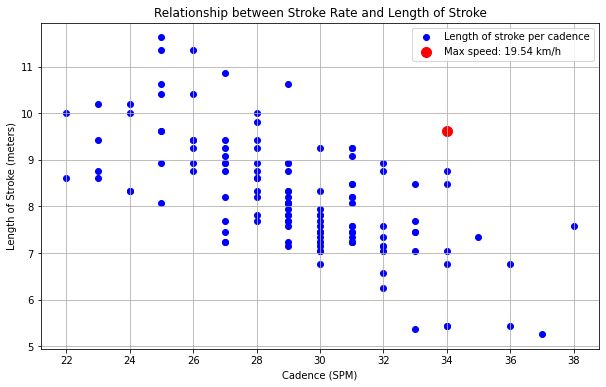

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("Test/ergometer_500m_norm.json")

distance = 0.5 # km


# Calcul de la longueur moyenne du coup (distance parcourue / nombre de coups)
df['stroke_length'] = (distance * 1000) / df['split_stroke_count']

# Calcul de la vitesse en km/h (distance en km / temps en heures)
df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = distance / df['split_time_hours']  # La distance est de 0.5 km (500m)

fastest_row = df.loc[df['speed_kmh'].idxmax()]

print(f"La vitesse maximale est de {fastest_row['speed_kmh']} km/h, atteinte à une cadence de {fastest_row['split_stroke_rate']} SPM.")



plt.figure(figsize=(10, 6))
plt.scatter(df['split_stroke_rate'], df['stroke_length'], color='blue', label='Length of stroke per cadence')

# point de cadence où la vitesse maximale est atteinte
plt.scatter(fastest_row['split_stroke_rate'], fastest_row['stroke_length'], color='red', s=100, label=f'Max speed: {fastest_row["speed_kmh"]:.2f} km/h')

plt.title('Relationship between Stroke Rate and Length of Stroke')
plt.xlabel('Cadence (SPM)')
plt.ylabel('Length of Stroke (meters)')
plt.grid()
plt.legend()

# Affichage du graphique
plt.show()


---